<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning Modeling<a id="5_Machine_Learning_Modeling"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Introduction<a id="5.1_Introduction"></a></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Imports<a id="5.2_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Loading the Data<a id="5.3_Loading_Data"></a></a></span></li><li><span><a href="#Data-Splitting" data-toc-modified-id="Data-Splitting-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Data Splitting<a id="5.4_Data_Splitting"></a></a></span></li><li><span><a href="#Model-Performance-Evaluation" data-toc-modified-id="Model-Performance-Evaluation-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model Performance Evaluation<a id="5.5_Model_Performance_Evaluation"></a></a></span></li><li><span><a href="#XGBoost-Model-" data-toc-modified-id="XGBoost-Model--5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>XGBoost Model <a id="5.6_XGBoost_Model"></a></a></span></li><li><span><a href="#Random-Forest-Model-" data-toc-modified-id="Random-Forest-Model--5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Random Forest Model <a id="5.7_Random_Forest"></a></a></span></li><li><span><a href="#Model-Performance-Evaluation-" data-toc-modified-id="Model-Performance-Evaluation--5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Model Performance Evaluation <a id="5.8_Model_Evaluation"></a></a></span></li><li><span><a href="#Machine-Learning-Summary-" data-toc-modified-id="Machine-Learning-Summary--5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Machine Learning Summary <a id="5.9_Machine_Learning_Summary"></a></a></span></li></ul></li></ul></div>

# Machine Learning Modeling<a id='5_Machine_Learning_Modeling'></a>

## Introduction<a id='5.1_Introduction'></a>

For previous phasese of this project, please feel free to access any of the following notebooks:

- 1. <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_DataWrangling.ipynb" target="_blank">Financial Frauds Problem Identification and Data Wrangling Notebook</a>
- 2. <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_Exploratory_Data_Analysis.ipynb" target="_blank">EDA Notebook</a>

- 3. <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_Preprocessing.ipynb" target="_blank">Pre-Processing and Training Data Development Notebook</a>

The focus of this notebook is on the machine learning modeling as shown below:

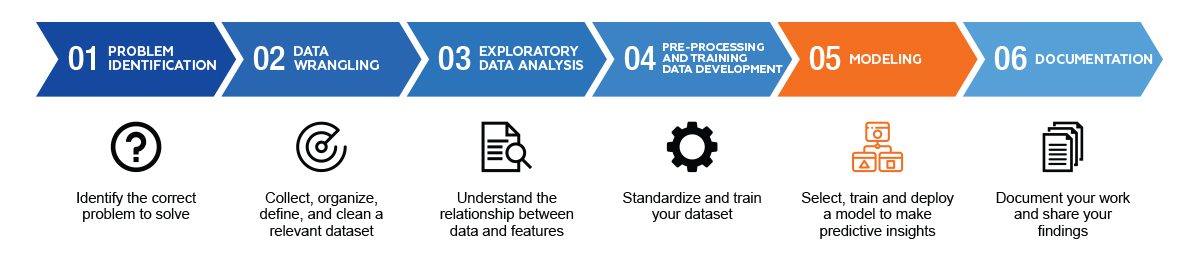

General Steps for this phase:

    Step 1: Load/import prerequisites and required modules/libraries
    Step 2: Import dataset and a quick check on data quality
    Step 3: Perform data splitting into X and y and model performance criteria
    Step 4: Perform predictive modelling with various algorithms
    Step 5: Evaluate various results to confirm the final model for this project

## Imports<a id='5.2_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, plot_confusion_matrix
from sklearn.metrics import roc_curve

from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# ignoring warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading the Data<a id='5.3_Loading_Data'></a>

In [2]:
# Loading the saved data from the previous step
data = pd.read_csv('../FinancialFraudDetection/data/data_ml.csv')

In [3]:
# Checking the data again to ensure the quality from the previous Pre-processing phase
print(data.shape)
print(data.info())

(6362620, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   level_0           int64  
 1   index             int64  
 2   step              int64  
 3   type              int64  
 4   amount            float64
 5   nameOrig          object 
 6   oldbalanceOrg     float64
 7   newbalanceOrig    float64
 8   nameDest          object 
 9   oldbalanceDest    float64
 10  newbalanceDest    float64
 11  isFraud           int64  
 12  tx_hour           int64  
 13  tx_between        object 
 14  tx_period         object 
 15  origin_bal_error  float64
 16  dest_bal_error    float64
dtypes: float64(7), int64(6), object(4)
memory usage: 825.2+ MB
None


## Data Splitting<a id='5.4_Data_Splitting'></a>

In [4]:
data.head()

,level_0,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,tx_hour,tx_between,tx_period,origin_bal_error,dest_bal_error
0,0,0,1,3,9.194276,C1231006815,12.044359,11.984786,M1979787155,0.000000,0.0,0,1,C2M,night,9.134703,9.253849
1,1,1,1,3,7.531166,C1666544295,9.964112,9.872292,M2044282225,0.000000,0.0,0,1,C2M,night,7.439346,7.622987
2,2,2,1,4,5.204007,C1305486145,5.204007,0.000000,C553264065,0.000000,0.0,1,1,C2C,night,0.000000,10.408013
3,3,3,1,1,5.204007,C840083671,5.204007,0.000000,C38997010,9.960954,0.0,1,1,C2C,night,0.000000,10.408013
4,4,4,1,3,9.364703,C2048537720,10.634773,10.305174,M1230701703,0.000000,0.0,0,1,C2M,night,9.035104,9.694302


In [5]:
# Identifying X and y from the dataset
X = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'origin_bal_error', 'dest_bal_error']]
y = data['isFraud']

In [6]:
# Split dataset into train and test with 70% for the training and the balance 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

In order to print results of different machine learning algorithms, I found a nice method done by this <a href="https://www.kaggle.com/trilokigupta/fraud-detection-eda-xgboost-rf" target="_blank">Kaggler</a> and I am using this for this notebook.

## Model Performance Evaluation<a id='5.5_Model_Performance_Evaluation'></a>

Since the focus is on finding the frauds from the transactions, I am going to focus on the following:

- Use AUPRC (Area Under Precision Recall Curve) in place of conventional AUROC (Area Under Receiver Operating Characteristics (Source Credit - <a href="http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf" target="_blank">The Relationship between Precision-Recall and ROC Curves</a>)
- The F1 score is the harmonic mean of the precision and recall. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero (Source Credit - <a href="https://en.wikipedia.org/wiki/F-score" target="_blank">Wikipedia for F-score</a>)
- Since we want a system to focus more on identifyig the right frauds, the machine learning results need to be focused more on false positives and false negatives.

In [7]:
# Printing results of the machine learning classifier using this method
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1-score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

## XGBoost Model <a id='5.6_XGBoost_Model'></a>

Since the data is imbalanced, I am going to use the class weights.

In [8]:
# Building the XGB model with Class Weights
class_weights = (y==0).sum()/(1 * (y==1).sum())
clf1 = XGBClassifier(scale_pos_weight = class_weights, n_jobs = 4, use_label_encoder=False, random_state=41)
clf1.fit(X_train, y_train)
print("Model Results of XGBoost with Test Data with Class Weights")
model_result(clf1, X_test, y_test)

[18:18:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Results of XGBoost with Test Data with Class Weights
AUPRC : 0.9972250743800787
F1-score : 0.9933641664990951
Confusion_matrix: 
[[1906283      22]
 [     11    2470]]
accuracy_score
0.9999827115244978
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906305
           1       0.99      1.00      0.99      2481

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



Based on the above results, False positives are 22 and False Negatives are 11 even though all other scores are good.

In [9]:
# Building the XGB model without Class Weights
clf2 = XGBClassifier(n_jobs = 4, use_label_encoder=False, random_state=41)
clf2.fit(X_train, y_train)
print("Model Results of XGBoost with Test Data without Class Weights")
model_result(clf2, X_test, y_test)

[18:29:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Results of XGBoost with Test Data without Class Weights
AUPRC : 0.997377611973015
F1-score : 0.9973753280839895
Confusion_matrix: 
[[1906303       2]
 [     11    2470]]
accuracy_score
0.9999931893884385
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906305
           1       1.00      1.00      1.00      2481

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



Based on the above results with no class weights, there are 2 False Positives(FP) and 11 False Negatives(FN). So this is better than doing it with the class weights.

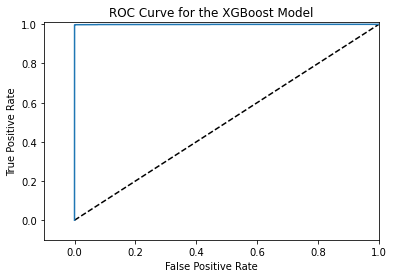

In [10]:
# Plotting the roc curve for the XGBoost model without class weights
y_pred_prob = clf2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plotting the roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.title("ROC Curve for the XGBoost Model")
plt.show()

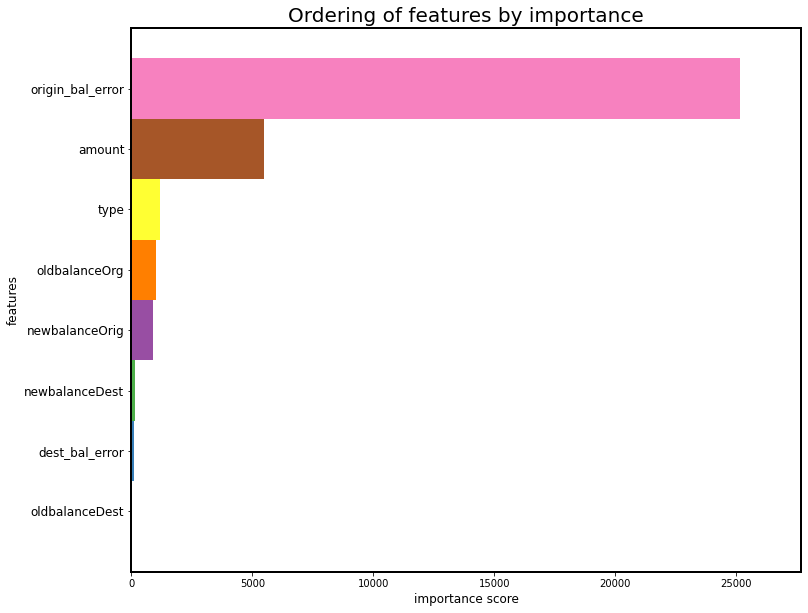

In [11]:
# Checking for which features are more important for the prediction
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf2, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 12);
ax.set_ylabel('features', size = 12);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance', size = 20);

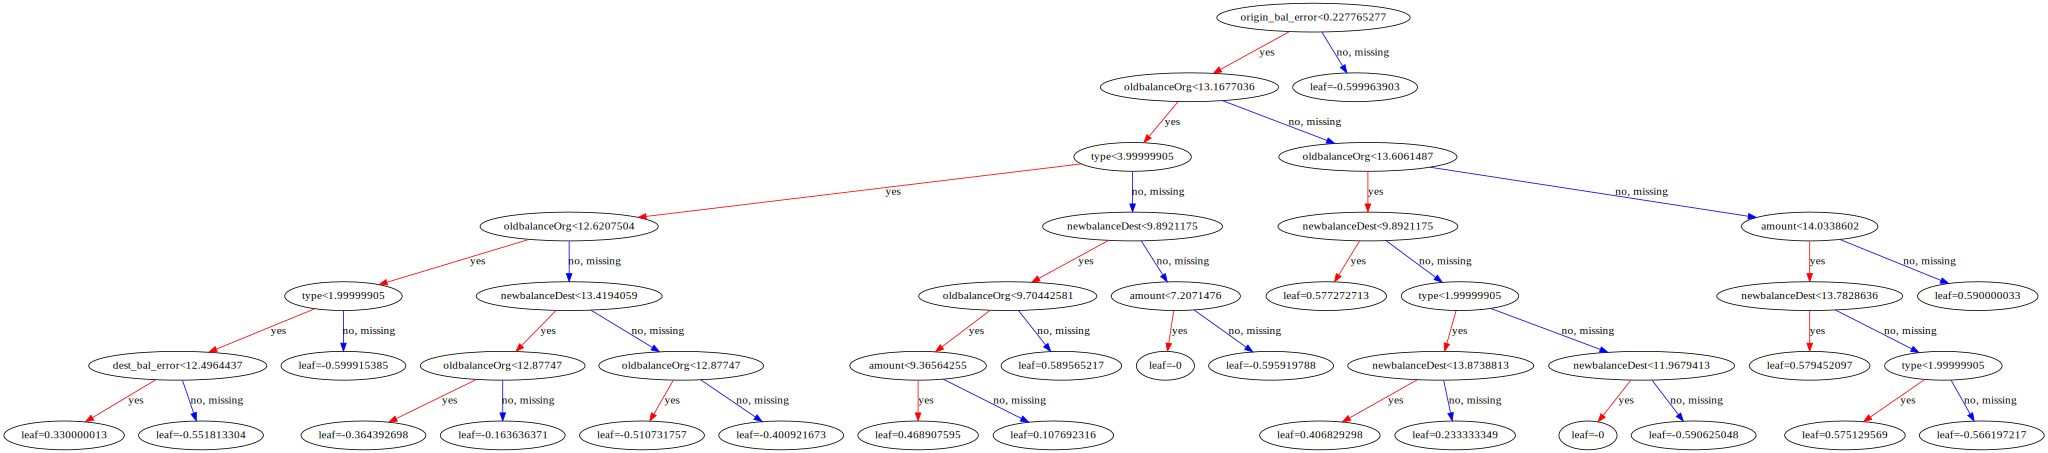

In [12]:
# Generating a visual decision tree
to_graphviz(clf2)

The importance score method had identified that the origin_bal_error is the main node for the identification of the fraud analysis and the same is highlighted visually via graph viz too.

## Random Forest Model <a id='5.7_Random_Forest'></a>

In [13]:
# Building the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Model Results of Random Forest with Test Data")
model_result(rf, X_test, y_test)

Model Results of Random Forest with Test Data
AUPRC : 0.9958837916963517
F1-score : 0.9975767366720517
Confusion_matrix: 
[[1906304       1]
 [     11    2470]]
accuracy_score
0.9999937132816356
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906305
           1       1.00      1.00      1.00      2481

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786



Based on the above results for the random forest model, there are 11 False Negatives (FN) and 1 False Positives (FP).

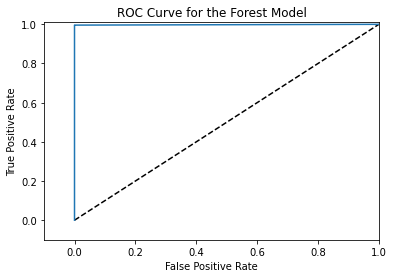

In [14]:
# Plotting the roc curve for the Random Forest model
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# plotting the roc curve
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.title("ROC Curve for the Forest Model")
plt.show()

## Model Performance Evaluation <a id='5.8_Model_Evaluation'></a>

For the model performance, there is more focus on the recall rate because it is all about avoiding the frauds to manage the impact on the company's reputation as well as minimize the losses. Hence confusion matrix became an important parameter for the model performance evaluation.

For the easy reference, difinitions are presented below:

    Accuracy = (TP + TN) / Total
    Presicion = TP / (TP + FP)
    Recall = TP / (TP + FN)

Here is the summary of the models along with its' False Positives and False Negatives:

a. XGBoost - 2 False Positives(FP) and 11 False Negatives(FN)

b. Random Forest - 1 False Positives(FP) and 11 False Negatives(FN)

While most of the other metrics are closer to each other, accuracy score for Random Forest is slightly better along with its less False Positives. Hence it is recommended that Random Forest model should be used for this application.

In [15]:
# Saving the Machine Learning phase data into a new datafile for future reference as required
datapath = '../FinancialFraudDetection/data'
save_file(data, 'data_final.csv', datapath)

Writing file.  "../FinancialFraudDetection/data\data_final.csv"


## Machine Learning Summary <a id='5.9_Machine_Learning_Summary'></a>

During this phase, the following was achieved:

- Data was split into independant and dependant variables.
- 70% data was used for training the model and 30% for testing the model.
- Two types of XGBoost models were run i.e. one with the class weights and the other one without the weights and their results were analyzed. Based on these results, it was decided that one without the weights is a better solution.
- Random Forest model was developed and its' performance with the final XGBoost model performance was compared.
- Final recommendation is to use the Random Forest model.

For the documentation phase, please click here for the <a href="https://github.com/jayguptacal/BankingAndInvestments/blob/main/FinancialFraudDetection/Financial_Frauds_Documentation.ipynb" target="_blank">Documentation Notebook</a>.